In [1]:
import pandas as pd


In [2]:
#load dataset
df = pd.read_csv("C:\\Users\\user\\AppData\\Local\\Temp\\8155d6e0-4857-4586-9960-f0d2465e893c_Basic stats - 1 (3).zip.93c\\Basic stats - 1\\sales_data_with_discounts.csv")

In [3]:
# Compute numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [4]:

for column in numerical_columns:
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series
    std_dev = df[column].std()
    print(f"{column}: Mean = {mean}, Median = {median}, Mode = {mode}, Std Dev = {std_dev}")


Volume: Mean = 5.066666666666666, Median = 4.0, Mode = 3, Std Dev = 4.231602391213926
Avg Price: Mean = 10453.433333333332, Median = 1450.0, Mode = 400, Std Dev = 18079.90483993645
Total Sales Value: Mean = 33812.83555555555, Median = 5700.0, Mode = 24300, Std Dev = 50535.07417255328
Discount Rate (%): Mean = 15.155241895330914, Median = 16.57776564929597, Mode = 5.007822189204133, Std Dev = 4.220602153325511
Discount Amount: Mean = 3346.499424342415, Median = 988.9337332382784, Mode = 69.17794228822787, Std Dev = 4509.9029633539985
Net Sales Value: Mean = 30466.336131270138, Median = 4677.788059301853, Mode = 326.97480055470817, Std Dev = 46358.656624066934


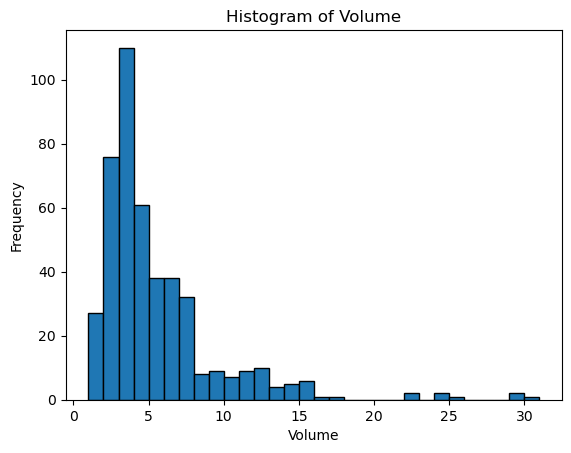

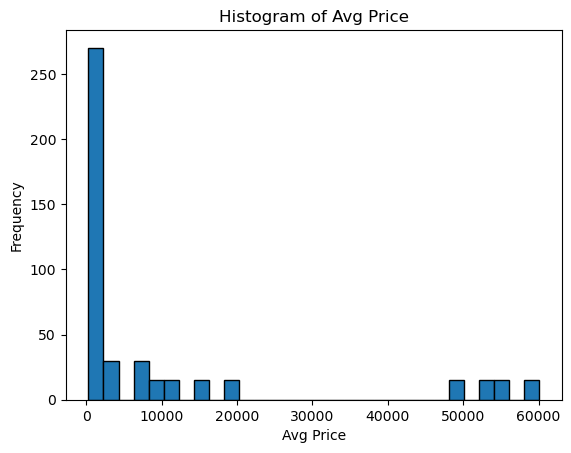

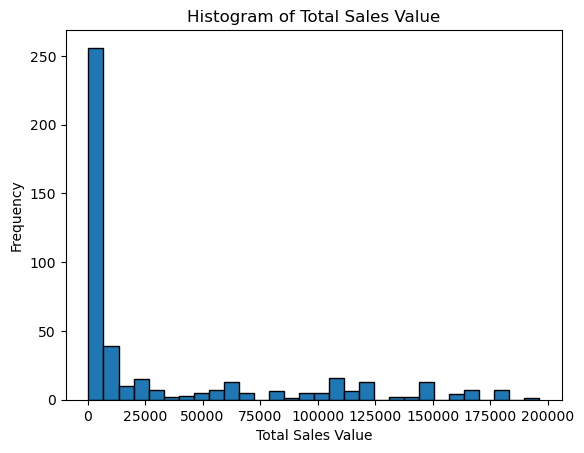

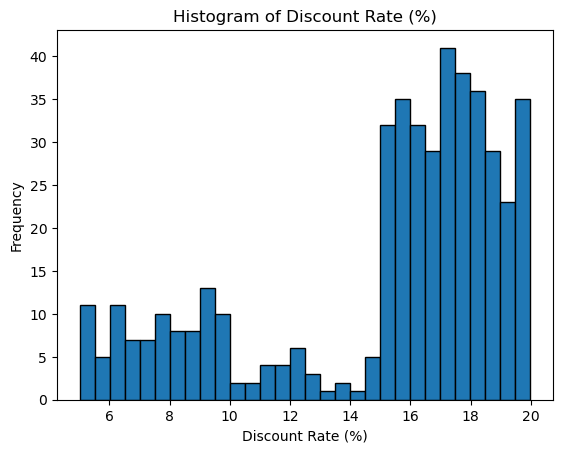

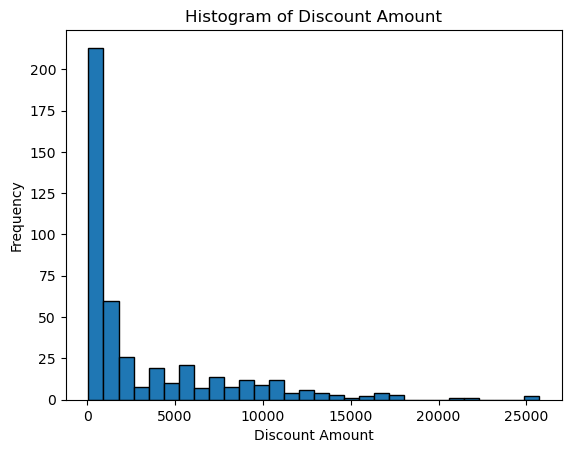

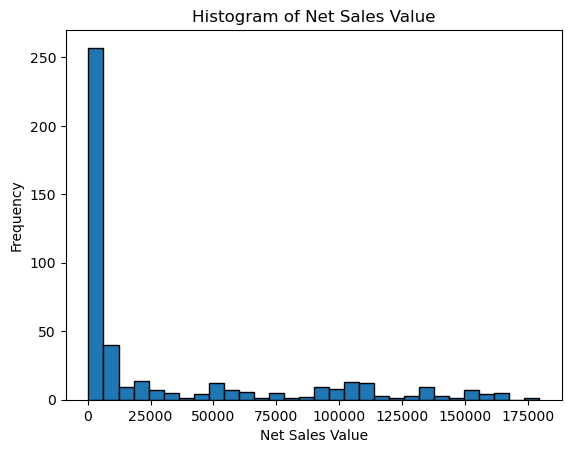

In [5]:
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.hist(df[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


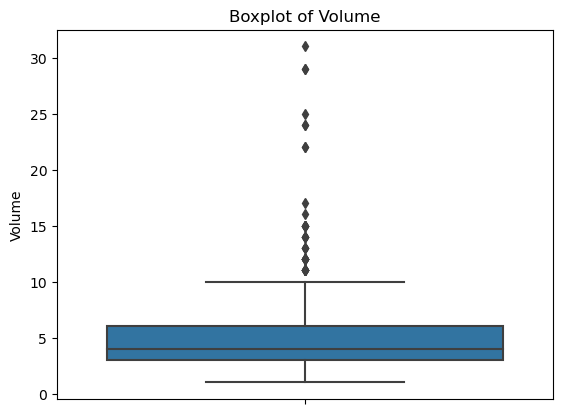

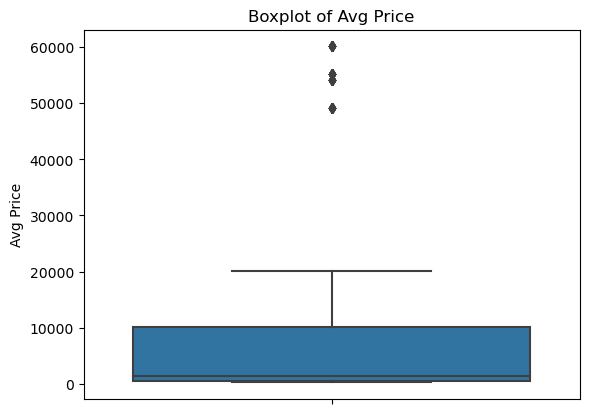

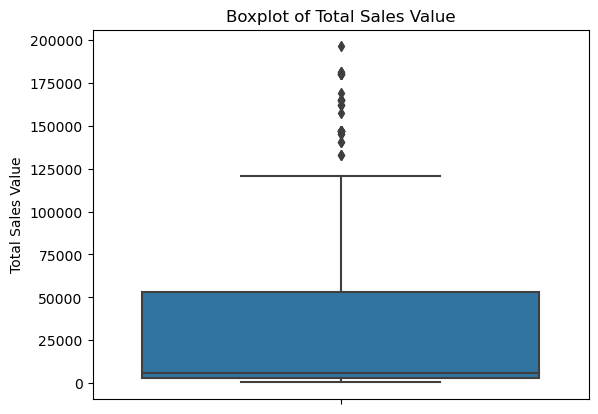

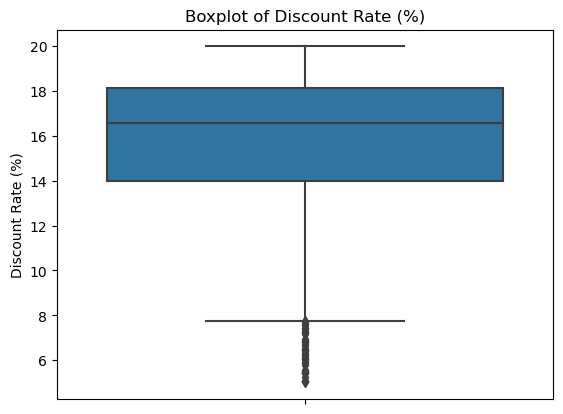

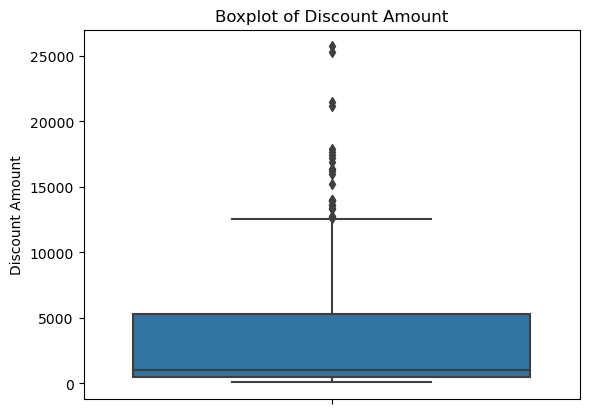

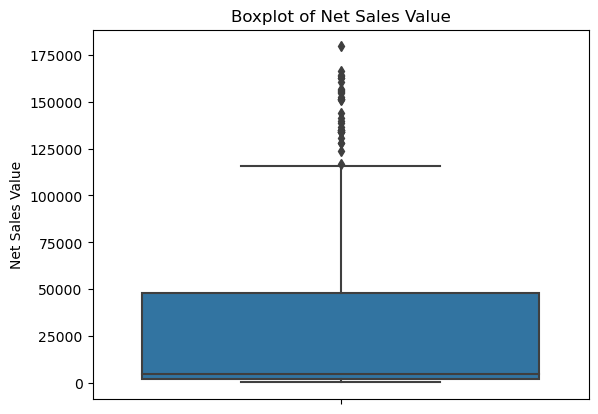

In [6]:
# Boxplots for numerical columns
import seaborn as sns

for column in numerical_columns:
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


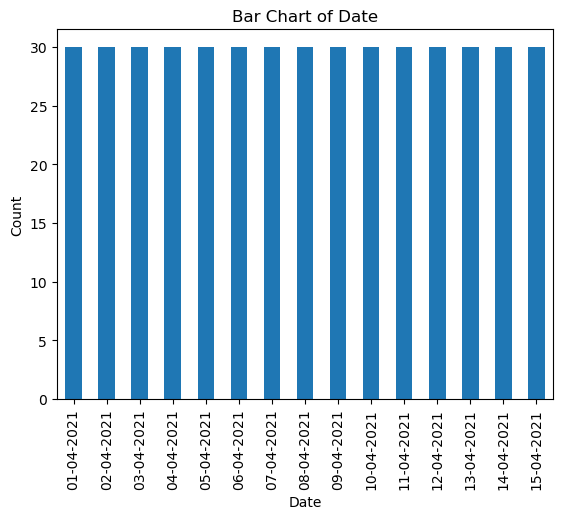

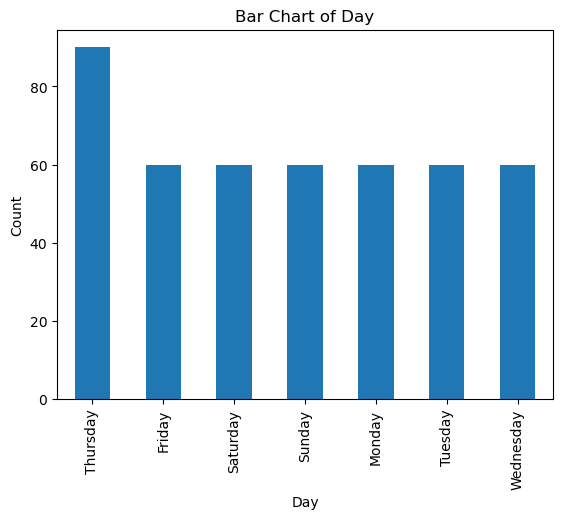

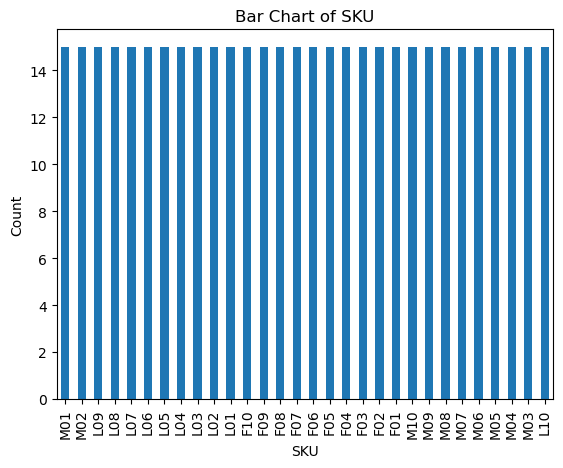

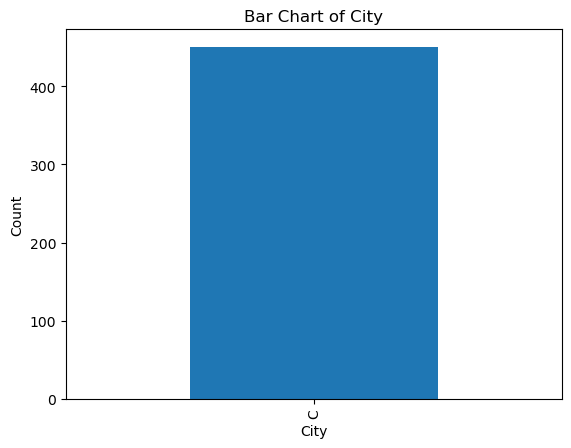

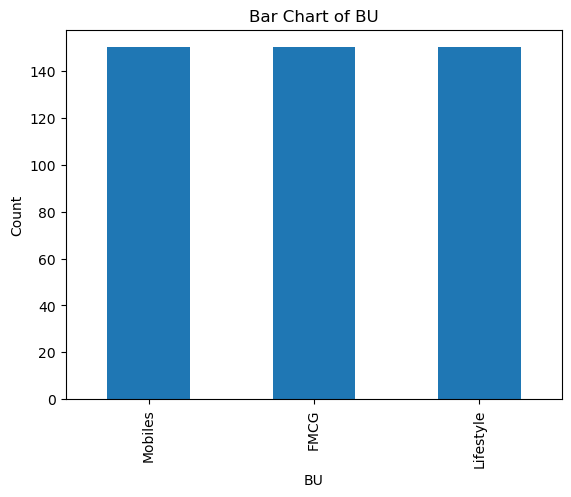

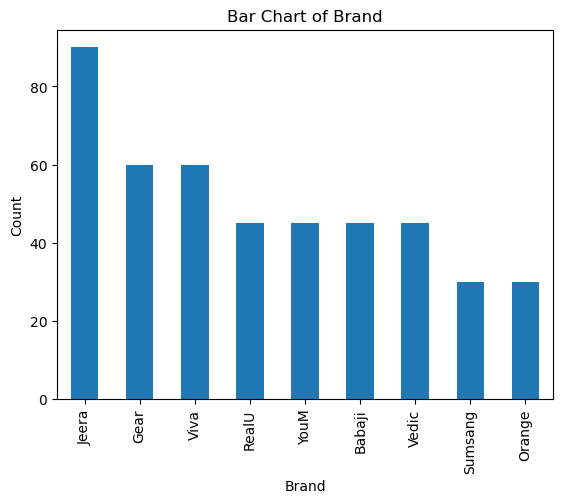

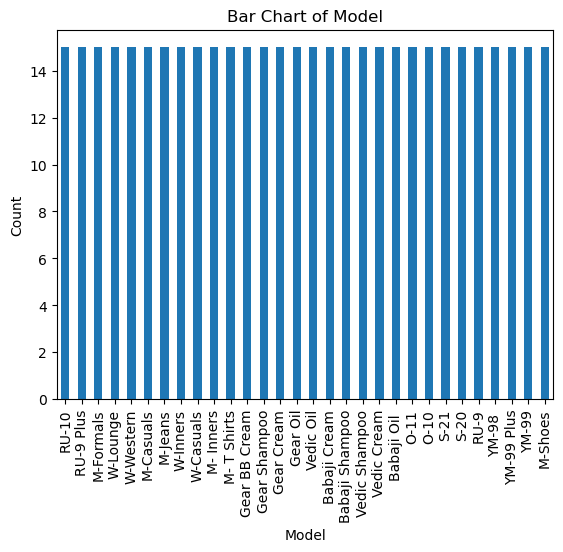

In [7]:
# Bar charts for categorical column
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [8]:
# Standardize numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])


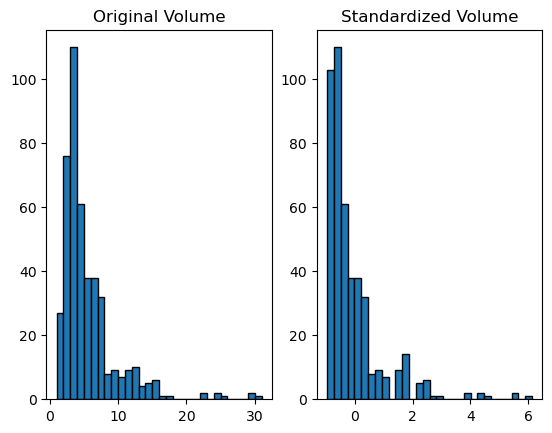

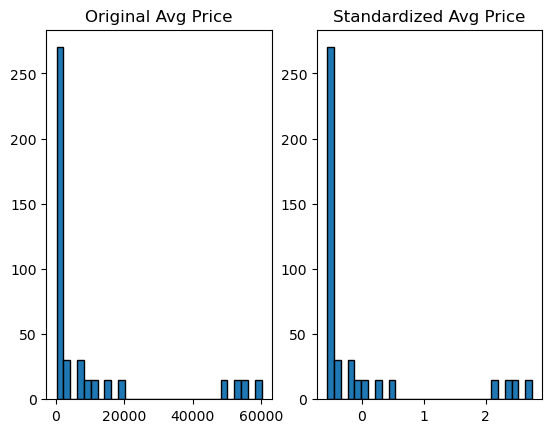

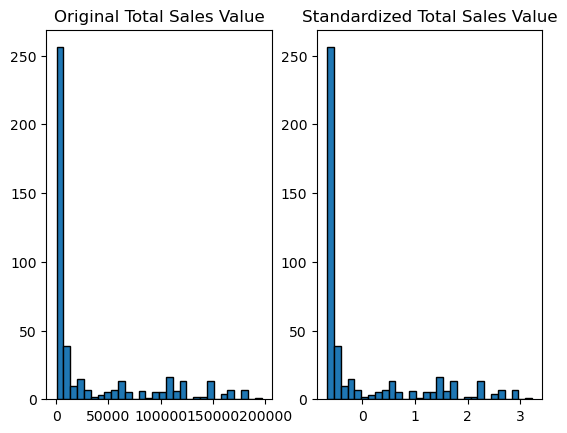

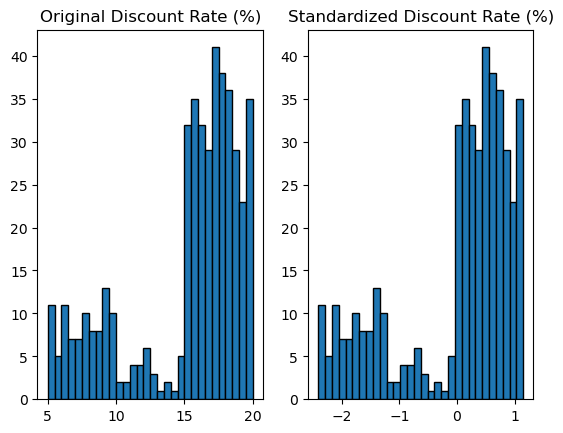

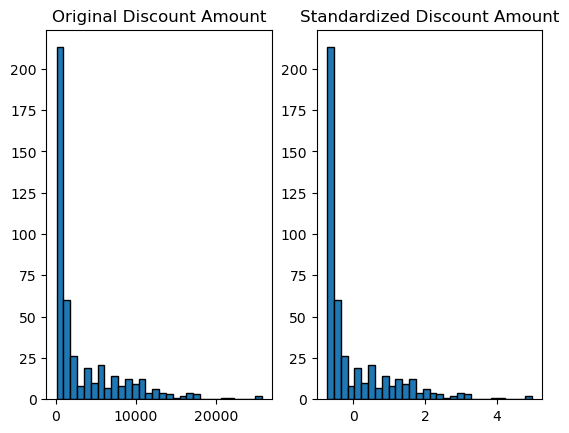

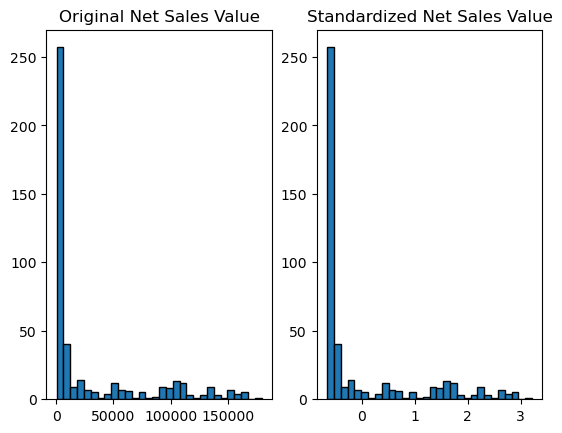

In [9]:
# Histograms of original and standardized numerical columns
for column in numerical_columns:
    plt.subplot(1, 2, 1)
    plt.hist(df[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Original {column}')
    
    plt.subplot(1, 2, 2)
    plt.hist(df_standardized[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Standardized {column}')
    
    plt.show()


In [10]:
# One-hot encoding for categorical variables
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [11]:
print(df_dummies.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...